np.random.seed(1) just so you remember how to set random seeds

ctrl + ' = hashtag

In [118]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(Z):
    """
    Compute the sigmoid of Z

    Arguments:
    Z -- A scalar or numpy array of any size.

    Return:
    A -- sigmoid of Z
    backprop_store -- returns Z for backpropagation
    """

    A = 1 / (1+np.exp(-Z))
    backprop_store = Z

    return A, backprop_store

def leaky_relu(Z):
    """
    Compute leaky_ReLU of Z

    arguments:
    Z -- A scalar of numpy array of any size

    return:
    A -- post-activation of leaky ReLU of Z, same shape as Z
    backprop_store -- returns Z for backpropagation
    """

    A = np.maximum(0.01 * Z, Z)
    assert(A.shape == Z.shape)

    backprop_store = Z

    return A, backprop_store

def relu(Z):
    """
    Compute regular ReLU of Z

    arguments:
    Z -- A scalar of numpy array of any size

    return:
    A -- post-activation of ReLU of Z, same shape as Z
    backprop_store -- returns Z for backpropagation
    """

    A = np.maximum(0, Z)
    assert(A.shape == Z.shape)

    backprop_store = Z

    return A, backprop_store


def tanh(Z):
    """
    Compute tanh of Z

    arguments:
    Z -- A scalar of numpy array of any size

    return:
    A -- post-activation of tanh of Z, same shape as Z
    backprop_store -- returns Z for backpropagation
    """

    A = (np.exp(Z)-np.exp(-Z))  /  (np.exp(Z)+np.exp(-Z))
    assert(A.shape == Z.shape)

    backprop_store = Z

    return A, backprop_store


def softmax(Z):
    """
    Compute softmax of Z

    arguments:
    Z -- A scalar of numpy array of any size

    return:
    A -- post-activation of softmax of Z, same shape as Z
    backprop_store -- returns Z for backpropagation
    """

    e_Z = np.exp(Z - np.max(Z))
    A = e_Z / e_Z.sum()
    assert(A.shape == Z.shape)

    backprop_store = Z

    return A, backprop_store

# Initialization

relu: try He initialization

tanh: try Xavier or even Yoshua

In [3]:
def initialize_parameters_he(dimension_of_layers):
    """
    Arguments:
    dimensions_of_layers -- array (list) of size in each layer; including input layer

    Returns:
    parameters -- dictionary containing parameters "W1", "b1", "W2", "b2",...
                W[layer] -- shape (dimension_of_layers[layer], (dimension_of_layers[layer-1])
                b[layer] -- bias vector shape (dimension_of_layers[layer], 1) 
    """
    
    parameters = {}
    L = len(dimension_of_layers)  # number of layers
    
    for layer in range(1, L):
        parameters["W" + str(layer)] = np.random.randn(dimension_of_layers[layer], 
                dimension_of_layers[layer - 1]) * np.sqrt(2. / dimension_of_layers[layer - 1])
        parameters["b" + str(layer)] = np.zeros( (dimension_of_layers[layer], 1) )
        
    return parameters

######################

def initialize_parameters_yoshua(dimension_of_layers):
    """
    Arguments:
    dimensions_of_layers -- array (list) of size in each layer; including input layer

    Returns:
    parameters -- dictionary containing parameters "W1", "b1", "W2", "b2",...
                W[layer] -- shape (dimension_of_layers[layer], (dimension_of_layers[layer-1])
                b[layer] -- bias vector shape (dimension_of_layers[layer], 1) 
    """
    
    parameters = {}
    L = len(dimension_of_layers)  # number of layers
    
    
    for layer in range(1, L):
        parameters["W" + str(layer)] = np.random.randn(dimension_of_layers[layer], 
                dimension_of_layers[layer - 1]) * np.sqrt(2. / (dimension_of_layers[layer - 1] + dimension_of_layers[layer]))
        parameters["b" + str(layer)] = np.zeros( (dimension_of_layers[layer], 1) )
    
    
    return parameters

#########################

def initialize_parameters_xavier(dimension_of_layers):
    """
    Arguments:
    dimensions_of_layers -- array (list) of size in each layer; including input layer

    Returns:
    parameters -- dictionary containing parameters "W1", "b1", "W2", "b2",...
                W[layer] -- shape (dimension_of_layers[layer], (dimension_of_layers[layer-1])
                b[layer] -- bias vector shape (dimension_of_layers[layer], 1) 
    """
    
    parameters = {}
    L = len(dimension_of_layers)  # number of layers
    
    
    for layer in range(1, L):
        parameters["W" + str(layer)] = np.random.randn(dimension_of_layers[layer], 
                dimension_of_layers[layer - 1]) * np.sqrt(1. / (dimension_of_layers[layer - 1]))
        parameters["b" + str(layer)] = np.zeros( (dimension_of_layers[layer], 1) )

    return parameters

################################

def initialize_parameters_random(dimension_of_layers):
    """
    Arguments:
    dimensions_of_layers -- array (list) of size in each layer; including input layer

    Returns:
    parameters -- dictionary containing parameters "W1", "b1", "W2", "b2",...
                W[layer] -- shape (dimension_of_layers[layer], (dimension_of_layers[layer-1])
                b[layer] -- bias vector shape (dimension_of_layers[layer], 1) 
    """
    
    parameters = {}
    L = len(dimension_of_layers)  # number of layers
    
    
    for layer in range(1, L):
        parameters["W" + str(layer)] = np.random.randn(dimension_of_layers[layer], dimension_of_layers[layer - 1]) * 0.01
        parameters["b" + str(layer)] = np.zeros( (dimension_of_layers[layer], 1) )


    return parameters

In [49]:
def initialize_parameters(dimension_of_layers, initialization):
    """
    Arguments:
    dimensions_of_layers -- array (list) of size in each layer; including input layer
    initialization -- stored as text string: "He", "Yoshua", "Xavier", or "random"

    Returns:
    parameters -- dictionary containing parameters "W1", "b1", "W2", "b2",...
                W[layer] -- shape (dimension_of_layers[layer], (dimension_of_layers[layer-1])
                b[layer] -- bias vector shape (dimension_of_layers[layer], 1) 
    """
    
    if initialization == "He":
        parameters = initialize_parameters_he(dimension_of_layers)
    elif initialization == "Yoshua":
        parameters = initialize_parameters_yoshua(dimension_of_layers)
    elif initialization == "Xavier":
        parameters = initialize_parameters_xavier(dimension_of_layers)
    elif initialization == "random":
        parameters = initialize_parameters_random(dimension_of_layers)
    else:
        print("ERROR: YOU MUST CHOOSE AN INITILIZATION: \"He\", \"Yoshua\", \"Xavier\", or \"random\"")
        
    return parameters

try to make a dictionary of backrop store instead of a list

In [4]:
def linear_forward(A_prev, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    backprop_store -- a python dictionary containing "W", "b", and "A_prev"; 
        stored in a backword order for computing the backward pass efficiently
    """

    Z = np.dot(W, A_prev) + b
    
    assert(Z.shape == (W.shape[0], A_prev.shape[1]))
    backprop_store = (W, b, A_prev)
    
    return Z, backprop_store

YOUR BACKPROP CACHE IS ORDERED AS W,B, A_PREV, Z

In [5]:
def linear_activation_forward_sigmoid(A_prev, W, b):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    
    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python dictionary containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
             "linear_cache" and "activation_cache" are caching, storing, exactly what's being passed in it's function.
             W, b, A_prev, Z (this order)
    """         
    
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = sigmoid(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

###############################

def linear_activation_forward_relu(A_prev, W, b):
    
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = relu(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

################################

def linear_activation_forward_leaky_relu(A_prev, W, b):
    
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = leaky_relu(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache        

###################################

def linear_activation_forward_tanh(A_prev, W, b):
    
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = tanh(Z)
        
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache 

######################################

def linear_activation_forward_softmax(A_prev, W, b):
    
    Z, linear_cache = linear_forward(A_prev, W, b)
    A, activation_cache = softmax(Z)
    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)
    
    return A, cache

In [6]:
def L_model_forward(X, parameters, dimension_of_layers, hidden_activation, output_activation):  
    caches = []
    A = X
    L = len(dimension_of_layers)
    """
    arguments:
    X -- data input. shape: (features, number of examples)
    parameters -- dictionary containing parameters "W1", "b1", "W2", "b2",...
                W[layer] -- shape (dimension_of_layers[layer], (dimension_of_layers[layer-1])
                b[layer] -- bias vector shape (dimension_of_layers[layer], 1)
    dimension_of_layers -- array (list) of size in each layer; including input layer
    hidden_activation -- stored as text string: "relu", "sigmoid", "relu", "leaky relu", or "tanh"
    output activation -- stored as text string: "sigmoid" of "softmax"
    
    Returns:
    AL -- activation of ouput layer
    caches -- a python dictionary containing "linear_cache" and "activation_cache" for all hidden layers and output layer;
             stored for computing the backward pass efficiently
             "linear_cache" and "activation_cache" are caching, storing, exactly what's being passed in it's function.
             W, b, A_prev, Z (this order)
    """
    
    
    # when using range in the loop below it will end at the final hidden loop
    # Calculating AL for the output layer also used L-1 because you did not use
    # a loop with range. So, you need to put L-1 due to Python starting index from 0.
    
    # Implement [LINEAR -> hidden_activation]*(L-1). Add "cache" to the "caches" list.
    
    for layer in range(1, L-1):    # This will loop through first hidden layer to last hidden layer (before output layer L)
        
        A_prev = A 
        
        if hidden_activation == 'sigmoid':
            A, cache = linear_activation_forward_sigmoid(A_prev, parameters['W' + str(layer)], parameters['b' + str(layer)])
            caches.append(cache)
        elif hidden_activation == 'relu':
            A, cache = linear_activation_forward_relu(A_prev, parameters['W' + str(layer)], parameters['b' + str(layer)])
            caches.append(cache)
        elif hidden_activation == 'leaky relu':
            A, cache = linear_activation_forward_leaky_relu(A_prev, parameters['W' + str(layer)], parameters['b' + str(layer)])
            caches.append(cache)
        elif hidden_activation == 'tanh':
            A, cache = linear_activation_forward_tanh(A_prev, parameters['W' + str(layer)], parameters['b' + str(layer)])
            caches.append(cache)
        else:
            print("ERROR: YOU MUST CHOOSE A HIDDEN ACTIVATION. HIDDEN TYPES: \"sigmoid\", \"relu\", \"leaky relu\", or \"tanh\"")
            return
    
    if output_activation == 'sigmoid':
        AL, cache = linear_activation_forward_sigmoid(A, parameters["W" + str(L-1)], parameters["b" + str(L-1)])
        caches.append(cache)
    elif output_activation == 'softmax':
        AL, cache = linear_activation_forward_softmax(A, parameters["W" + str(L-1)], parameters["b" + str(L-1)])
        caches.append(cache)
    else:
        print("ERROR: YOU MUST CHOOSE AN OUTPUT ACTIVATION. OUTPUT TYPES: \"sigmoid\" or \"softmax\"")
            
        
    return AL, caches

This is the cross-entropy for logistic regression (sigmoid). You still need to do the softmax cost which needs to be turned into a one hot before it can be done

In [68]:
def cost_sigmoid(AL, Y):
    """
    Implement the cost function, cross-entropy cost for "sigmoid" function

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector, shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    # Compute loss from aL and y.
    cost = cost = (   (    np.dot(Y, np.log(AL.T))   )  +  (np.dot(  (1 - Y), np.log(1 - AL.T)  )  )   )  /  -m
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

#def compute_cost_softmax

In [60]:
def compute_cost(AL, Y, output_activation):
    """
    Implement the cost function, cross-entropy cost for "sigmoid" function

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector, shape (1, number of examples)
    output_activation -- stored as text string: "sigmoid" of "softmax"

    Returns:
    cost -- cross-entropy cost
    """
    
    if output_activation == "sigmoid":
        cost = cost_sigmoid(AL, Y)
    else:
        print("ERROR: YOU MUST CHOOSE AN OUTPUT ACTIVATION. OUTPUT TYPES: \"sigmoid\" or \"softmax\"")
        return
    
    return cost

In [8]:
### need to also make backward function softmax. Or do you???????

def relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0  # wherever Z is less than or equal to 0 then 0 
                    # will be placed in dZ for that index.This works because they are
                    # the same size
    
    assert (dZ.shape == Z.shape)
    
    return dZ

###################################

def sigmoid_backward(dA, cache):
    """
    Implement the backward propagation for a single SIGMOID unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    
    s = 1/(1+np.exp(-Z))
    dZ = dA * s * (1-s)
    
    assert (dZ.shape == Z.shape)
    
    return dZ

######################################

def leaky_relu_backward(dA, cache):
    """
    Implement the backward propagation for a single RELU unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = np.array(dA, copy=True) # just converting dz to a correct object.
    
    # When z <= 0, you should set dz to 0 as well. 
    dZ[Z <= 0] = 0.01  # wherever Z is less than or equal to 0 then 0.01 
                    # will be placed in dZ for that index.This works because they are
                    # the same size
    
    assert (dZ.shape == Z.shape)
    
    return dZ


#########################################

def tanh_backward(dA, cache):
    """
    Implement the backward propagation for a single tanh unit.

    Arguments:
    dA -- post-activation gradient, of any shape
    cache -- 'Z' where we store for computing backward propagation efficiently

    Returns:
    dZ -- Gradient of the cost with respect to Z
    """
    
    Z = cache
    dZ = dA * (1  -  ((np.exp(Z)-np.exp(-Z))  /  (np.exp(Z)+np.exp(-Z)))**2)  # you can't use your tanh function because it also 
                                                                              # returns a backprop store
    
    assert(dZ.shape == Z.shape)
    
    return dZ

In [9]:
def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    W, b, A_prev = cache
    m = A_prev.shape[1]

    dW = np.dot(dZ, A_prev.T) / m
    db = np.sum(dZ, axis = 1, keepdims = True) / m       ## remember this one for that type of formula!
    dA_prev = np.dot(W.T, dZ)
    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [10]:
def linear_activation_backward_sigmoid(dA, cache):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    dZ = sigmoid_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

########################################

def linear_activation_backward_relu(dA, cache):
    linear_cache, activation_cache = cache
    
    dZ = relu_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db 

######################################
def linear_activation_backward_leaky_relu(dA, cache):
    linear_cache, activation_cache = cache
    
    dZ = leaky_relu_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

#########################################
def linear_activation_backward_tanh(dA, cache):
    linear_cache, activation_cache = cache
    
    dZ = tanh_backward(dA, activation_cache)
    dA_prev, dW, db = linear_backward(dZ, linear_cache)
    
    return dA_prev, dW, db

In [11]:
def L_model_backward(AL, Y, caches, hidden_activation, output_activation):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0 if non-cat, 1 if cat)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    hidden_activation -- stored as text string: "relu", "sigmoid", "relu", "leaky relu", or "tanh"
    output activation -- stored as text string: "sigmoid" of "softmax"
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers NOT including input layer                    
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation
    if output_activation == "sigmoid":
        dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))
    else:
        print("ERROR: YOU MUST CHOOSE AN OUTPUT ACTIVATION. OUTPUT TYPES: \"sigmoid\" or \"softmax\"")
        ############ also need to make a derivate of cost function for softmax
        
    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]
    current_cache = caches[L - 1]    # this is accounting that Python indexes from 0
    
    if output_activation == "sigmoid":
        grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward_sigmoid(dAL, current_cache)
    else:
        print("ERROR: YOU MUST CHOOSE AN OUTPUT ACTIVATION. OUTPUT TYPES: \"sigmoid\" or \"softmax\"")
        ##########also need to add softmax here
    
    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)): # This is actually accounting Python indexes from 0 AND that range goes only to number before.
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 
        current_cache = caches[l]
        
        if hidden_activation == "sigmoid":
            grads["dA" + str(l)], grads["dW" + str(l+1)], grads["db" + str(l+1)] = linear_activation_backward_sigmoid(grads["dA" + str(l+1)], current_cache)
        
        elif hidden_activation == "relu":
            grads["dA" + str(l)], grads["dW" + str(l+1)], grads["db" + str(l+1)] = linear_activation_backward_relu(grads["dA" + str(l+1)], current_cache)
        
        elif hidden_activation == 'leaky relu':
            grads["dA" + str(l)], grads["dW" + str(l+1)], grads["db" + str(l+1)] = linear_activation_backward_leaky_relu(grads["dA" + str(l+1)], current_cache)
        
        elif hidden_activation == 'tanh':
            grads["dA" + str(l)], grads["dW" + str(l+1)], grads["db" + str(l+1)] = linear_activation_backward_tanh(grads["dA" + str(l+1)], current_cache)
        
        else:
            print("ERROR: YOU MUST CHOOSE A HIDDEN ACTIVATION. HIDDEN TYPES: \"sigmoid\", \"relu\", \"leaky relu\", or \"tanh\"")
            break
            
    return grads

In [38]:
def update_parameters_gradient_descent(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    learning_rate -- the learning rate, scalar.
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network not including input layer

    # Update rule for each parameter. Use a for loop.
    for l in range(L):
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - (learning_rate * grads["dW" + str(l + 1)])
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - (learning_rate * grads["db" + str(l + 1)])
    return parameters

In [96]:
def update_parameters(parameters, grads, update_type, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    update_type -- stored as text string: "gradient descent" or ect
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    if update_type == "gradient descent":
        parameters = update_parameters_gradient_descent(parameters, grads, learning_rate)
    else:
        print("choose update type such as adam, momentum, etc")
        
    return parameters

In [119]:
def L_layer_model(X, Y, dimension_of_layers, initialization, hidden_activation, output_activation, update_type,
                  learning_rate=.01, num_iterations=100, print_cost=False):
    """
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (number of examples, num_px * num_px * 3)
    Y -- true "label" vector (containing 0 if cat, 1 if non-cat), of shape (1, number of examples)
    dimension_of_layers -- list containing the input size and each layer size; including input layer
    initialization -- stored as text string: "He", "Yoshua", "Xavier", or "random"
    hidden_activation -- stored as text string: "relu", "sigmoid", "relu", "leaky relu", or "tanh"
    output activation -- stored as text string: "sigmoid" of "softmax"
    update_type -- stored as text string: "gradient descent" or ect
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    costs = []
    
    parameters = initialize_parameters(dimension_of_layers, initialization)
    
    for i in range(1, num_iterations):
        
        AL, caches = L_model_forward(X, parameters, dimension_of_layers, hidden_activation, output_activation)
        
        cost = compute_cost(AL, Y, output_activation) ############################### need to clean this for soft max cost
        
        grads = L_model_backward(AL, Y, caches, hidden_activation, output_activation)
        
        parameters = update_parameters(parameters, grads, update_type, learning_rate) ################## maybe add adam
        
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
        if print_cost and i % 100 == 0:
            costs.append(cost)
            
    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()   
        
    return parameters

Cost after iteration 100: 0.604461
Cost after iteration 200: 0.578247
Cost after iteration 300: 0.550972
Cost after iteration 400: 0.521209
Cost after iteration 500: 0.486577
Cost after iteration 600: 0.430437
Cost after iteration 700: 0.403134
Cost after iteration 800: 0.377130
Cost after iteration 900: 0.351309
Cost after iteration 1000: 0.325694
Cost after iteration 1100: 0.300663
Cost after iteration 1200: 0.273840
Cost after iteration 1300: 0.245496
Cost after iteration 1400: 0.215843
Cost after iteration 1500: 0.186821
Cost after iteration 1600: 0.163960
Cost after iteration 1700: 0.148582
Cost after iteration 1800: 0.134406
Cost after iteration 1900: 0.125990
Cost after iteration 2000: 0.112297


C:\Users\P\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in log
  app.launch_new_instance()
C:\Users\P\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:27: RuntimeWarning: invalid value encountered in true_divide
C:\Users\P\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:49: RuntimeWarning: invalid value encountered in maximum
C:\Users\P\Anaconda3\envs\py3\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in less_equal


Cost after iteration 2100: 0.103019
Cost after iteration 2200: nan
Cost after iteration 2300: nan
Cost after iteration 2400: nan
Cost after iteration 2500: nan
Cost after iteration 2600: nan
Cost after iteration 2700: nan
Cost after iteration 2800: nan
Cost after iteration 2900: nan


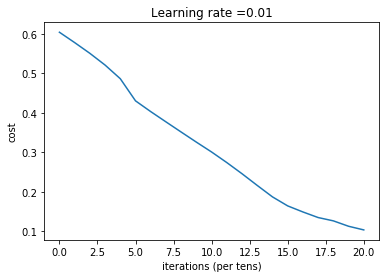

In [128]:
np.random.seed(1)
X = np.random.rand(2,8)*10
dimension_of_layers = [2,5,3,8,1]
Y = np.array([[1,1,0,0,1,1,0,1]])

paremeters = L_layer_model(X, Y, dimension_of_layers, initialization="He", hidden_activation="relu", 
                           output_activation="sigmoid", update_type="gradient descent",
                           learning_rate=.01, num_iterations=3000, print_cost=True)